In [1]:
import ROOT as r

Welcome to JupyROOT 6.24/07


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import mplhep as hep
from root_numpy import hist2array

In [3]:
testFileName = "/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_2000_M2_1100_NANOAOD.root"

f = r.TFile.Open(testFileName)
tree = f.Get("Events")

Warning in <TClass::Init>: no dictionary for class __pair_base<edm::Hash<1>,edm::ParameterSetBlob> is available


In [4]:
jet0Masses = r.TH1F("jet0m","",300,0,3000)
jet1Masses = r.TH1F("jet1m","",300,0,3000)
jet2Masses = r.TH1F("jet2m","",300,0,3000)

nEvts = tree.GetEntriesFast()

for i in range(nEvts):    
    tree.GetEvent(i)
    
    
    if tree.nFatJet<3:
        continue
    
    pts     = tree.FatJet_pt
    etas    = tree.FatJet_eta
    phis    = tree.FatJet_phi
    masses  = tree.FatJet_msoftdrop
    
    jet0Flag = pts[0]>250 and abs(etas[0])<2.5 and masses[0]>60
    jet1Flag = pts[1]>250 and abs(etas[1])<2.5 and masses[1]>60
    jet2Flag = pts[2]>250 and abs(etas[2])<2.5 and masses[2]>60

    if not (jet0Flag and jet1Flag and jet2Flag):
        continue
    
    jet0 = r.TLorentzVector()
    jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])
    
    jet1 = r.TLorentzVector()
    jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])
    
    jet2 = r.TLorentzVector()
    jet2.SetPtEtaPhiM(pts[2],etas[2],phis[2],masses[2])
    
    
    jet0Masses.Fill(jet0.M())
    jet1Masses.Fill(jet1.M())
    jet2Masses.Fill(jet2.M())

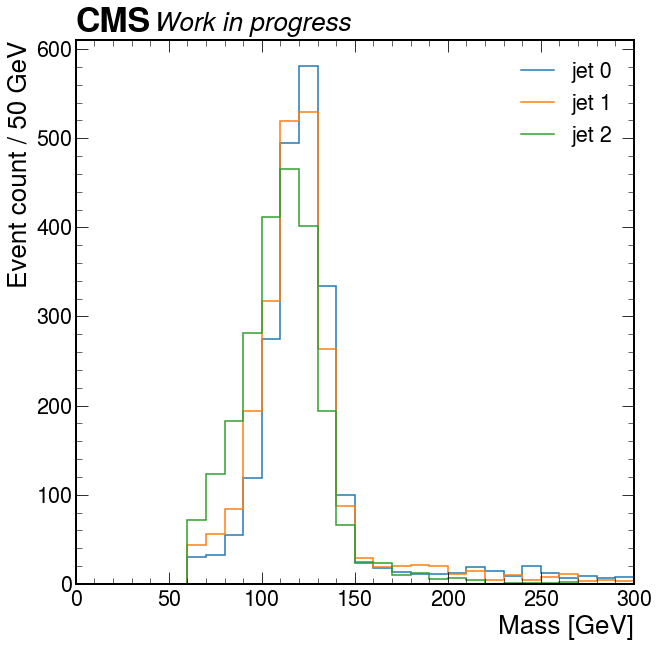

In [10]:
plt.style.use([hep.style.CMS])

jet0, edges = hist2array(jet0Masses,return_edges=True)
jet1, edges = hist2array(jet1Masses,return_edges=True)
jet2, edges = hist2array(jet2Masses,return_edges=True)

edges = edges[0]

hep.histplot([jet0,jet1,jet2],edges,label=["jet 0","jet 1","jet 2"],stack=False)

hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 300])
plt.legend(loc='best')

#gauss_fit(jet0, edges, [600, 120, 4])

Standard deviation is 14.47 GeV
 FCN=132.689 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=9.81872e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.41678e+02   1.68603e+01   6.90076e-02  -5.35219e-05
   2  Mean         1.19999e+02   3.45848e-01   1.84315e-03  -2.88076e-03
   3  Sigma        1.44671e+01   3.10179e-01   2.46073e-05  -2.31077e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


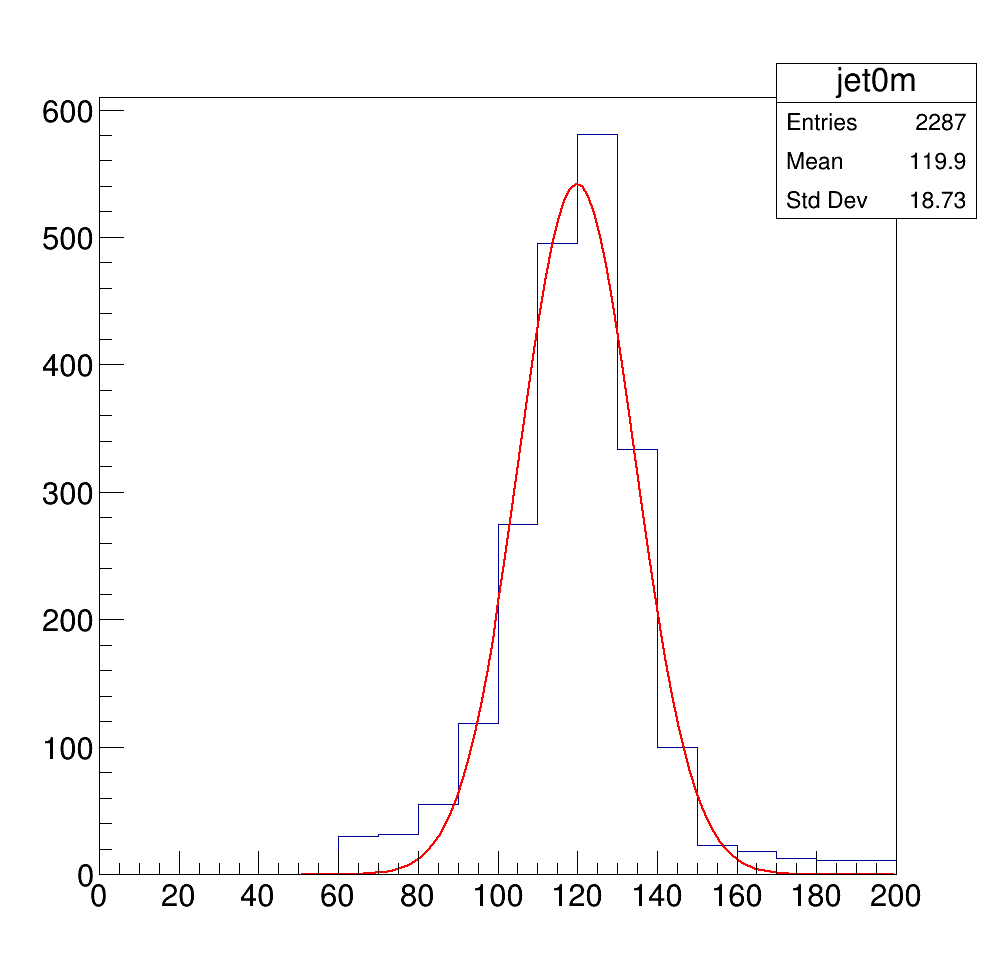

In [63]:
fit = jet0Masses.Fit("gaus","S","",50,200)
c = r.TCanvas("c","",1000,1000)
c.cd()
jet0Masses.Draw()
jet0Masses.GetXaxis().SetRangeUser(0., 200.);
fit.Draw()
c.Draw()

sigma = fit.Get().Parameters()[2]
print("Standard deviation is {0:.2f} GeV".format(sigma))

[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 135.0, 145.0, 155.0, 165.0, 175.0, 185.0, 195.0] [  0.   0.   0.   0.   0.   0.  30.  32.  55. 119. 275. 495. 581. 334.
 100.  23.  18.  13.  11.  11.]
[574.46829542 121.09582681  -9.59044807]


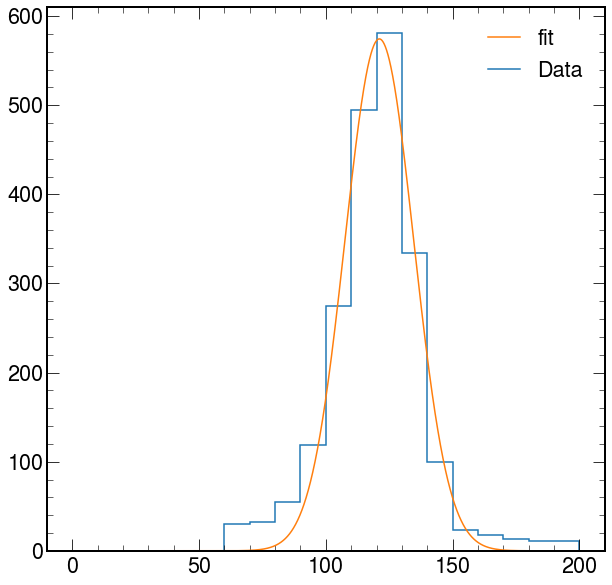

In [48]:
#gauss fit
from scipy.stats import norm

def gauss(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma)**2)

def gauss_fit(jet, edges, p0):
    x = [] #bin centers
    for i in range(len(edges)-1):
        x.append(edges[i]/2.+edges[i+1]/2.)
    y = jet
    
    print(x,y)
    
    
    popt, pcov = curve_fit(gauss, x, y, p0, maxfev=100000)
    
    print(popt)
    
    hep.histplot(jet,edges,label=["Data"],stack=False)
    x_interval_for_fit = np.linspace(x[0], x[-1], 10000)
    plt.plot(x_interval_for_fit, gauss(x_interval_for_fit, *popt), label='fit')
    plt.legend()
 

gauss_fit(jet0[:20], edges[:21], [1,120,10])#We "cut" the list to only fit the interesting part